
# Basic example of usage VisionTransforms



In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.insert(0, "..")

In [3]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Let's suppose that datapoint is `((img, scalars), (mask, bboxes, labels))`

In [4]:
img = np.random.randint(0, 70, size=(310, 310, 3), dtype=np.uint8)
img[10:150, 34:120] += 127
img[220:250, 134:180] += 140

mask = np.zeros((310, 310, 3), dtype=np.uint8)
mask[10:150, 34:120, :] = (220, 120, 0)
mask[220:250, 134:180, :] = (23, 33, 220)

bboxes = np.array([
    [34, 10, 120, 150],
    [134, 220, 180, 250],
])
labels = [1, 2]

In [5]:
# !pip install --upgrade git+https://github.com/vfdev-5/ImageDatasetViz
    
from image_dataset_viz import render_datapoint, bbox_to_points

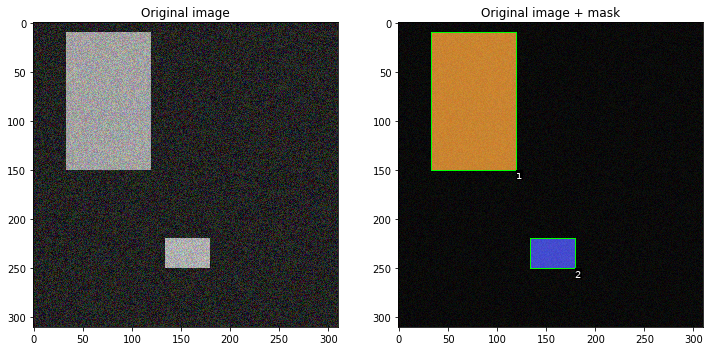

In [6]:
from PIL import Image

rimg = render_datapoint(Image.fromarray(img), Image.fromarray(mask))
rimg = render_datapoint(rimg, [(bbox_to_points(b), str(l)) for b, l in zip(bboxes, labels)])

plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.title("Original image")
plt.imshow(img)
plt.subplot(122)
plt.title("Original image + mask")
plt.imshow(rimg)

In [23]:
import vision_transforms as vt

In [24]:
class DataTransform(vt.BaseTransform):
    
    def __init__(self):
        
        self.random_crop = vt.RandomCrop(size=224)
        self.bbox_random_crop = vt.BBoxRandomCrop(input_canvas_size=310, output_canvas_size=224)
        
    def __call__(self, datapoint):
        
        rng = self.get_rng()
        
        x, y = datapoint
        img_rgb, scalars = x
        mask, bboxes, labels = y
        
        t_bboxes = self.bbox_random_crop(bboxes, rng)
        t_img_rgb = self.random_crop(img_rgb, rng)                       
        t_mask = self.random_crop(mask, rng)        

    
        return ((t_img_rgb, scalars), (t_mask, t_bboxes, labels))


dtf = DataTransform()

In [25]:
import random

random.seed(12)
vt.set_image_backend("opencv")

In [26]:
dp = ((img, 123), (mask, bboxes, labels))

t_dp = dtf(dp)

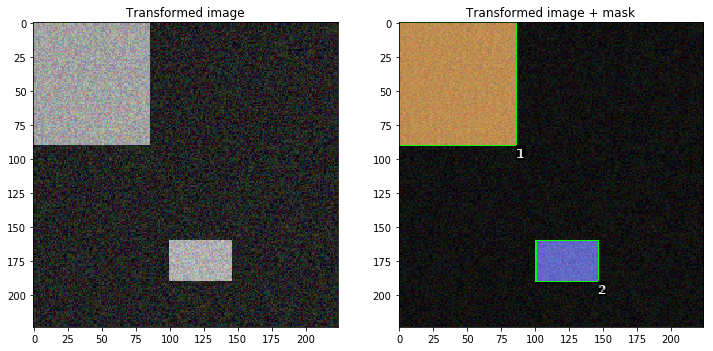

In [27]:
x, y = t_dp
t_img, scalars = x
t_mask, t_bboxes, labels = y


rimg = render_datapoint(Image.fromarray(t_img), Image.fromarray(t_mask), blend_alpha=0.5)
rimg = render_datapoint(rimg, [(bbox_to_points(b), str(l)) for b, l in zip(t_bboxes, labels)])


plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.title("Transformed image")
plt.imshow(t_img)
plt.subplot(122)
plt.title("Transformed image + mask")
plt.imshow(rimg)

In [28]:
import random

random.seed(12)
vt.set_image_backend("pillow")

In [30]:
dp = ((Image.fromarray(img), 123), (Image.fromarray(mask), bboxes, labels))

t_dp = dtf(dp)

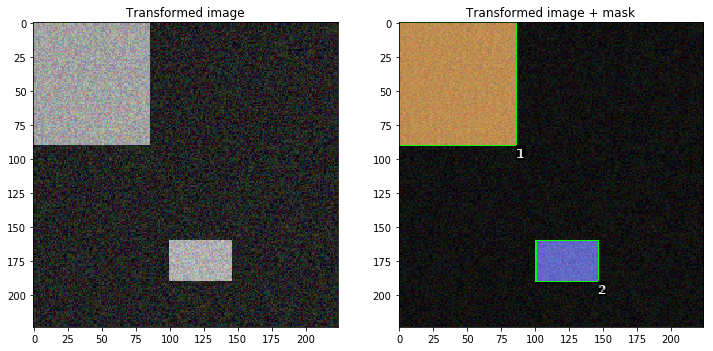

In [32]:
x, y = t_dp
t_img, scalars = x
t_mask, t_bboxes, labels = y


rimg = render_datapoint(t_img, t_mask, blend_alpha=0.5)
rimg = render_datapoint(rimg, [(bbox_to_points(b), str(l)) for b, l in zip(t_bboxes, labels)])


plt.figure(figsize=(12, 12))
plt.subplot(121)
plt.title("Transformed image")
plt.imshow(t_img)
plt.subplot(122)
plt.title("Transformed image + mask")
plt.imshow(rimg)